# Проектная работа: анализ данных пользователей для магазина "Стримчик"

# Описание проекта

**Дано:** данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы по состоянию на 2016 год.

```datasets/games.csv```

**Цель исследования:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Гипотезы для проверки:**

+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования:**

О данных мало что известно. Поэтому перед проверкой гипотез понадобится обзор данных.  
Нужно проверить данные на ошибки и оценить их влияние на исследование, проверить на начилие дубликатов или пропущенных значений.  
После визуализировать данные, оценить все ли они еще актуальны, полезны и удобны для проверки предоставленных гипотез.
После чего уже проверить гипотезы.

Таким образом, исследование пройдёт в три этапа:

+ Обзор данных
+ Предобработка данных
+ Анализ данных
+ Проверка гипотез

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from IPython.display import Image

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from scipy import stats as st

### Шаг 1. Загрузка данных

Даны исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы на 2016 год.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
data = pd.read_csv('/datasets/games.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Предварительный вывод:** в распоряжении довольно объёмные данные об игровой статистике в 16715 строк. Какая информация лежит в каждой колонке понятно, можно приступать к предподготовке.

### Шаг 2. Предобработка данных

In [10]:
# Приведу названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Типы данных

In [11]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [12]:
# год это целочисленные данные: к int64
data['year_of_release'] = data['year_of_release'].astype('Int64')
# score обработаю ниже

#### Работа с пропусками и дубликатами

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [14]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

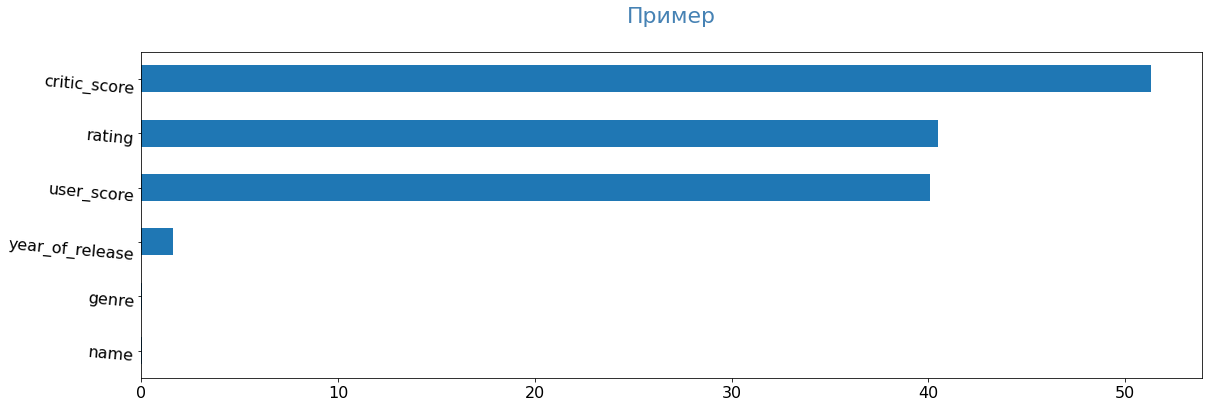

In [15]:
pass_value_barh(data)

In [16]:
# Полных дубликатов нет
data.duplicated().sum()

0

Для проверки на неполные дубликаты, приведу ```name```, ```platform``` к одному виду:

In [17]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
# еще жанр
data['genre'] = data['genre'].str.lower()

In [18]:
# Неполные дубликаты
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [19]:
data.shape[0]

16715

In [20]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)
data.shape[0]

16713

##### ```name```
Пропуск в графе ```name``` заполнить невозможно, эти две строки убираю из датасета.

In [21]:
data = data.dropna(subset=['name'])
data.shape[0]

16712

In [22]:
# Строки с дубликатами name 
data.query('name.duplicated()').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,frozen: olaf's quest,ds,2013,platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
14657,007: quantum of solace,pc,2008,action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: quantum of solace,ds,2008,action,0.11,0.01,0.00,0.01,65.0,tbd,T
1785,007: quantum of solace,ps3,2008,action,0.43,0.51,0.02,0.19,65.0,6.6,T
4475,007: quantum of solace,ps2,2008,action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14997,zoocube,gc,2002,puzzle,0.02,0.00,0.00,0.00,67.0,6.1,E
669,zumba fitness,x360,2010,sports,1.74,0.45,0.00,0.18,42.0,5.5,E
3516,zumba fitness,ps3,2010,sports,0.28,0.21,0.00,0.08,NaN,3.8,E
13172,zumba fitness core,x360,2012,misc,0.00,0.05,0.00,0.00,77.0,6.7,E10+


Строк с дубликатами имени довольно много.  
Похоже, это связано с тем, что одна игра для разных платформ считается разными продуктами. Это не ошибка, данные не трогаю.

##### ```year_of_release```

Из данных выше видно, что у игр версии для платформ выходят в один год. Проверю, если у игры есть другие версии, можно заполнить пропущенный год выхода.

In [23]:
data.query('year_of_release.isna()')['name']

183                        madden nfl 2004
377                       fifa soccer 2004
456             lego batman: the videogame
475             wwe smackdown vs. raw 2006
609                         space invaders
                       ...                
16371    pdc world championship darts 2008
16403                        freaky flyers
16446                            inversion
16456          hakuouki: shinsengumi kitan
16520                         virtua quest
Name: name, Length: 269, dtype: object

In [24]:
for name in data.query('year_of_release.isna()')['name']:
    data.loc[(data['name'] == name) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['name'] == name), 'year_of_release']
    
data['year_of_release'].isna().sum()

269

К сожалению, у игр с пропущенным годом выпуска нет никаких доступных данных, чтобы заполнить пропуски. Оставлю данные, как есть.

##### ```critic_score``` , ```user_score``` 

 Посмотрю сколько пропусков в этих колонках:  

In [25]:
data[(data['user_score'].isna()) & (data['critic_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
data['user_score'].isna().sum()

6699

In [27]:
data['critic_score'].isna().sum()

8576

In [28]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [29]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Скорее всего, оценка пользователей и оценка критиков связана с продажами игры какой-то закономерностью

**Создам столбец для общих продаж каждой игры во всех регионах:**

In [30]:
# Столбец с суммой
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

```user_score``` это object из-за наличия оценки 'tbd' - to be described (она ещё не получена от пользователей), в моем случае она равноценна пропуску, так что заменю его пропусками, приведу столбец к типу float и умножу на 10, чтобы оценки от критиков и пользователей были в одном формате, чтобы обработать все вместе:

In [31]:
data['user_score'] = data['user_score'].replace('tbd',np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['user_score'] = data['user_score']*10

Найду коэффициент Пирсона для общих продаж и оценки критиков и пользователей:

In [32]:
data.query('~user_score.isna() & ~critic_score.isna()')['sum_sales'].corr(
    data.query('~user_score.isna() & ~critic_score.isna()')['critic_score'])

0.23703015071151984

In [33]:
data.query('~user_score.isna() & ~critic_score.isna()')['sum_sales'].corr(
    data.query('~user_score.isna() & ~critic_score.isna()')['user_score'])

0.08854660867526534

К сожалению, очевидной корреляции у оценок критиков и пользователей с продажами нет. Несмотря на большое количество пропущенных данных, заполнить их нечем.

In [34]:
data.query('user_score.isna() & critic_score.isna()').groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2010    719
2009    715
2008    646
2011    601
2007    466
2006    362
1998    346
2012    314
2015    305
1999    298
1997    268
2005    263
1996    255
2014    247
2013    239
2016    235
1995    219
2000    202
2002    193
2004    189
2003    173
2001    155
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: name, dtype: int64

In [35]:
data['sum_sales'].mean()

0.533346098611776

In [36]:
data.query('user_score.isna() & critic_score.isna()')['sum_sales'].mean()

0.3847957016118956

In [37]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [38]:
data['user_score'].unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

In [39]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
sum_sales             0
dtype: int64

##### ```rating```

In [40]:
data['rating'].isna().sum()

6764

In [41]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [42]:
data.groupby('rating')['name'].count().sort_values(ascending=False)

rating
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: name, dtype: int64

Можно объединить все рейтинги ниже Е10+ в категорию "другое", их очень мало

In [43]:
data['rating'] = data['rating'].replace(['EC', 'K-A', 'RP', 'AO'], 'other')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'other'], dtype=object)

Рейтинг восстановить всё же нельзя, но чтобы не терять строки с пустым рейтингом при анализе, заменю на "unknown"

In [44]:
data['rating'] = data['rating'].fillna('unknown')

---

**Промежуточный вывод:** В данных много пропущенной информации для критериев оценки, как критиков, так и игроков, которую не удалось восстановить. Это нужно иметь ввиду в ходе дальнейшей работы.

In [45]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  sum_sales        16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


### Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [46]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: name, dtype: int64

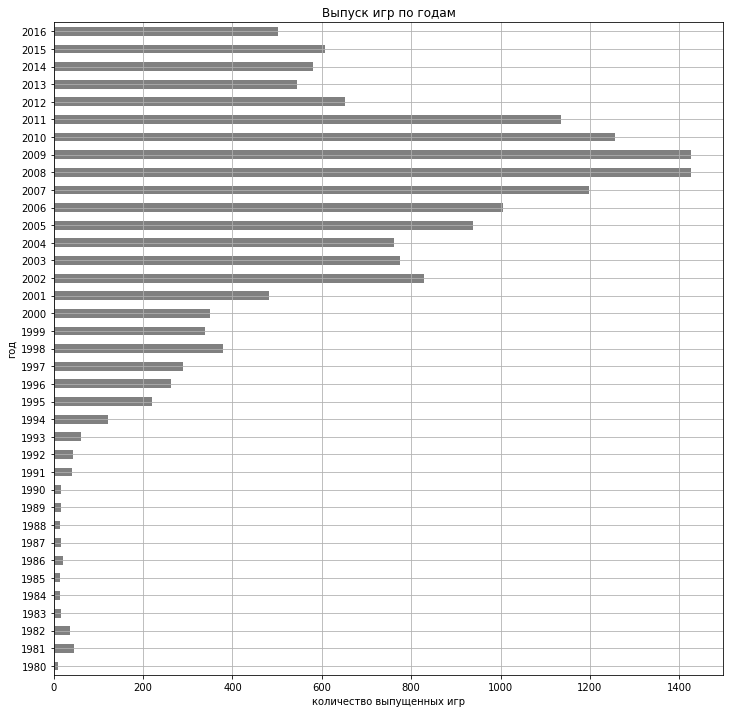

In [47]:
ax = data.groupby(data['year_of_release'].sort_values(ascending=False))['name'].count().plot(
    kind='barh',
    color='gray',
    title='Выпуск игр по годам',
    figsize=(12,12),
    grid=True);
ax.set_xlabel('количество выпущенных игр');
ax.set_ylabel('год');

Хорошо видно, что до ~1994 года игр выпускалось совсем мало, что логично.  
Пик игростроя случился в 2009 году, после чего идет тенденция на спад.
Данные до 1995 года важность имеют небольшую, так как количество игр очень маленькое, да и их характер очень отличается от популярных современных.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [48]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10)

platform
ps2     1255.77
x360     971.42
ps3      939.64
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
Name: sum_sales, dtype: float64

Выберу платформы с продажами больше 700 миллионов копий.

In [49]:
platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

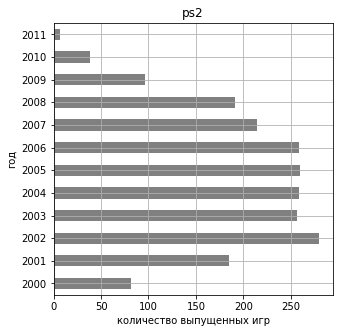

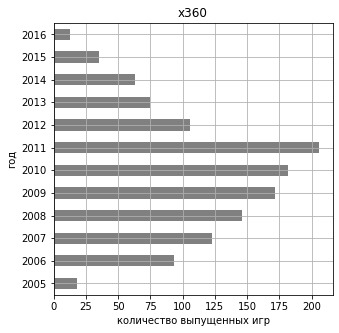

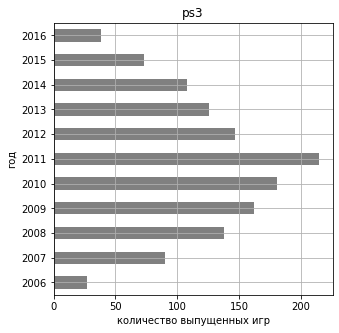

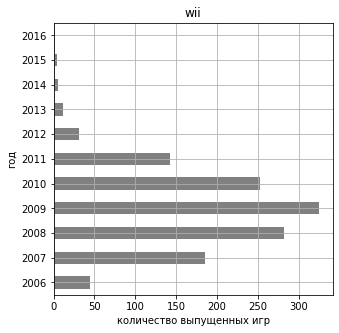

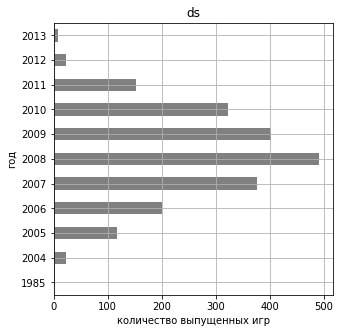

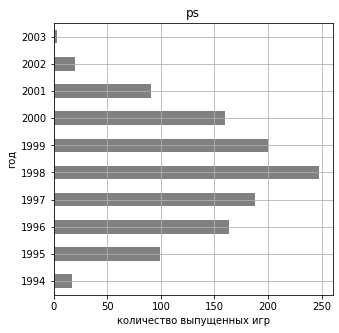

In [50]:
for item in platforms:
    ax = data.query('platform == @item').groupby(data['year_of_release'].sort_values(ascending=False))['name'].count().plot(
        kind='barh',
        color='gray',
        title=item,
        figsize=(5,5),
        grid=True);
    ax.set_xlabel('количество выпущенных игр');
    ax.set_ylabel('год');
    plt.show();

По графикам выше можно сказать, что в среднем жизненный цикл платформы составляет **~10 лет**. 

In [51]:
data.query('platform == "ds" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15956,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


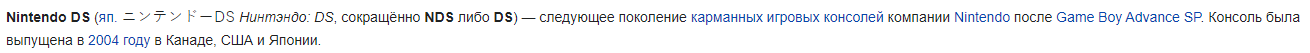

Похоже, что в строке опечатка в году выпуска, удалю её из исследования

In [52]:
data = data.drop(axis=0, index=15956)

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Судя по графику выхода игр по годам, пик количества выпускаемых игр прошел в 2008-2009гг и идёт тенденция к снижению до 2011. С 2012 по 2016 год количество игр всё еще снижается, однако плавно; период жизни платформы 10 лет, причем пик её существования - это ~5, дальше спад; буду использовать этот временной период:

In [53]:
data_final = data.query('year_of_release >= 2014')
data_final.shape[0]

1689

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [54]:
# Какие лидируют:
data_final.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: sum_sales, dtype: float64

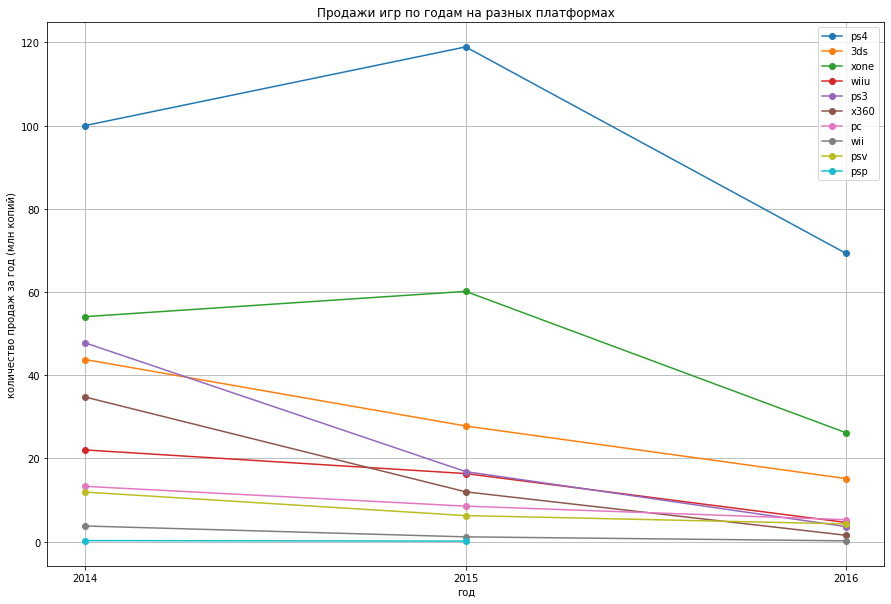

In [55]:
# Продажи по годам выпуска игр
for item in data_final['platform'].unique():
    ax = data_final.query('platform == @item').groupby(data_final['year_of_release'].sort_values(ascending=False))['sum_sales'].sum().plot(
        style='o-',
        grid=True,
        figsize=(15,10),
        title='Продажи игр по годам на разных платформах',
        label=item,
        legend=True
        )
ax.set_xlabel('год');
ax.set_ylabel('количество продаж за год (млн копий)');
plt.xticks(np.arange(2014, 2017, 1));


На 2015 год PS4 и XOne демонстрировали рост, дальше у всех платформ тенденция к спаду.  
Можно выделить PS4, XOne и 3DS как самые продаваемые на 2015-2016гг.  
Посмотрю ещё с какой скоростью падают продажи на каждой платформе, чтобы принять решение об их перспективах.

In [56]:
# Скорость роста продаж
pd.pivot_table(data_final, index=['platform', 'year_of_release'],
               values=['sum_sales']).pct_change().sort_values(by='year_of_release', ascending=False).head(9)

,,sum_sales
platform,year_of_release,
xone,2016,-0.600167
ps3,2016,-0.588835
wii,2016,-0.368421
psv,2016,-0.120000
ps4,2016,-0.513464
x360,2016,-0.657834
wiiu,2016,-0.437309
pc,2016,-0.429447
3ds,2016,0.018906


In [57]:
# Продажи игр 2016 года выпуска
data_final.query('year_of_release == 2016').groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
ps4     69.25
xone    26.15
3ds     15.14
pc       5.25
wiiu     4.60
psv      4.25
ps3      3.60
x360     1.52
wii      0.18
Name: sum_sales, dtype: float64

Ни одна платформа не демонстрировала роста в 2016г, все продажи падают с довольно большой скоростью.  
Как самые перспективные (топ-5), по моему мнению, платформы для вложений: **PS4, XOne, 3DS, PC и WiiU**.

In [58]:
chosen_platforms = [ 'ps4', 'xone', '3ds', 'pc' , 'wiiu']

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

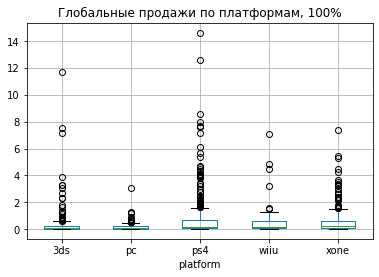

In [59]:
# 100%
ax = data_final.query('platform == @chosen_platforms').boxplot(column='sum_sales', by='platform');
plt.title('Глобальные продажи по платформам, 100%');
plt.suptitle('');

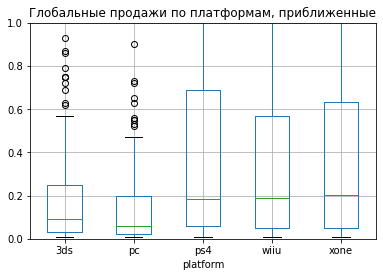

In [60]:
# Нижняя часть 
ax = data_final.query('platform == @chosen_platforms').boxplot(column='sum_sales', by='platform');
plt.ylim(0,1);
plt.title('Глобальные продажи по платформам, приближенные');
plt.suptitle('');

Довольно много выбросов в бóльшую сторону, нет в меньшую, что вряд ли плохо.

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
К сожалению, на этих графиках видны только выбросы, и совсем не видны медиана и 75% квантиль, плюс тяжело сравнивать разрозненные ящики между собой                 
       
__Для более обоснованных выводов  стоит  перерисовать диаграмму размаха__, на актуальной выборке:
        
+ используя параметр by, который позволит сравнить ящики всех жанров на одном виде, 
+ в двух масштабах: 
    + 100% 
    + и где будет отображена только нижняя часть boxplot-ов
        
      
Оба вида важны, т.к. выбросы — это наши звезды, которые приносят максимум выручки        
        
оставил ссылку на примеры
              
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html?highlight=boxplo#pandas.DataFrame.boxplot
           
        
для изменения масштаба стоит применить ylim()
            
https://matplotlib.org/stable/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберу в качестве платформы PS4

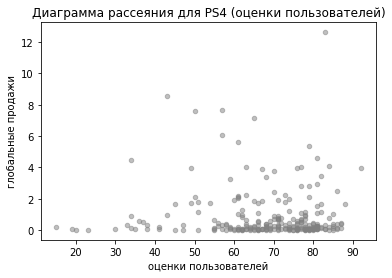

In [61]:
# Для отзывов пользователей
data_final.query('platform == "ps4"').plot(kind='scatter',
                                     x='user_score',
                                     y='sum_sales',
                                     color='gray',
                                     alpha=0.5,
                                     xlabel='оценки пользователей',
                                     ylabel='глобальные продажи',
                                     title='Диаграмма рассеяния для PS4 (оценки пользователей)'
                                    );

In [62]:
data_final.query('platform == "ps4"')['sum_sales'].corr(
    data_final.query('platform == "ps4"')['user_score']).round(2)

-0.04

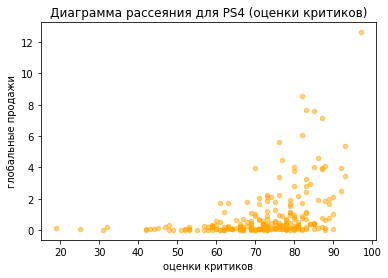

In [63]:
# Для отзывов критиков
data_final.query('platform == "ps4"').plot(kind='scatter',
                                     x='critic_score',
                                     y='sum_sales',
                                     color='orange',
                                     alpha=0.5,
                                     xlabel='оценки критиков',
                                     ylabel='глобальные продажи',
                                     title='Диаграмма рассеяния для PS4 (оценки критиков)'
                                    );

In [64]:
data_final.query('platform == "ps4"')['sum_sales'].corr(
    data_final.query('platform == "ps4"')['critic_score']).round(2)

0.4

Проверю, справедливо ли это для других платформ:

In [65]:
for item in chosen_platforms:
    corr = data_final.query('platform == @item')['sum_sales'].corr(
           data_final.query('platform == @item')['user_score']).round(2)
    print (item, 'user_corr:', corr)
    
    corr = data_final.query('platform == @item')['sum_sales'].corr(
           data_final.query('platform == @item')['critic_score']).round(2)
    print (item, 'critic_corr:', corr)

ps4 user_corr: -0.04
ps4 critic_corr: 0.4
xone user_corr: -0.07
xone critic_corr: 0.43
3ds user_corr: 0.22
3ds critic_corr: 0.31
pc user_corr: -0.07
pc critic_corr: 0.17
wiiu user_corr: 0.41
wiiu critic_corr: 0.37


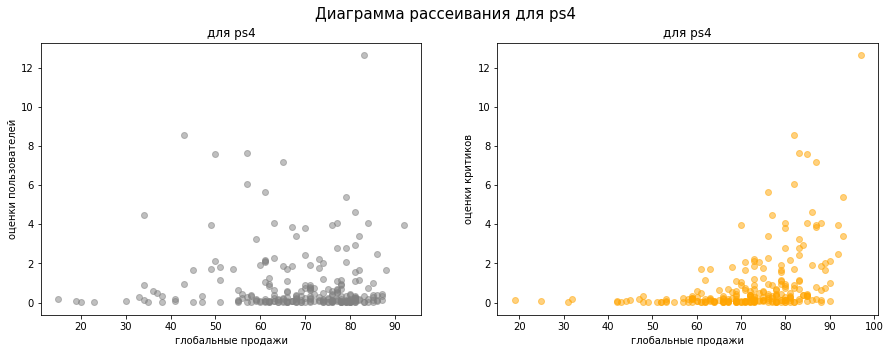

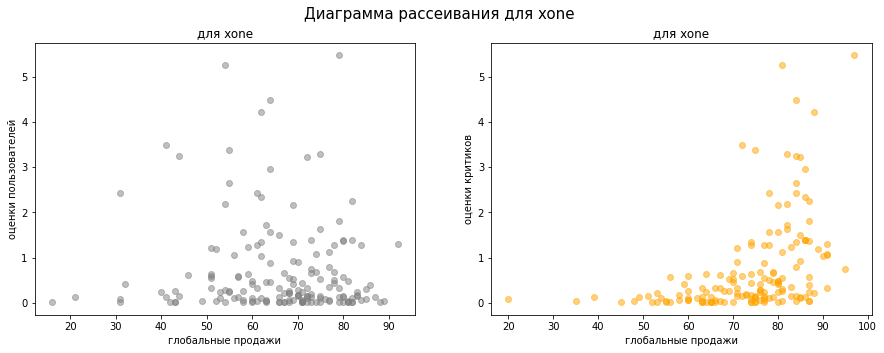

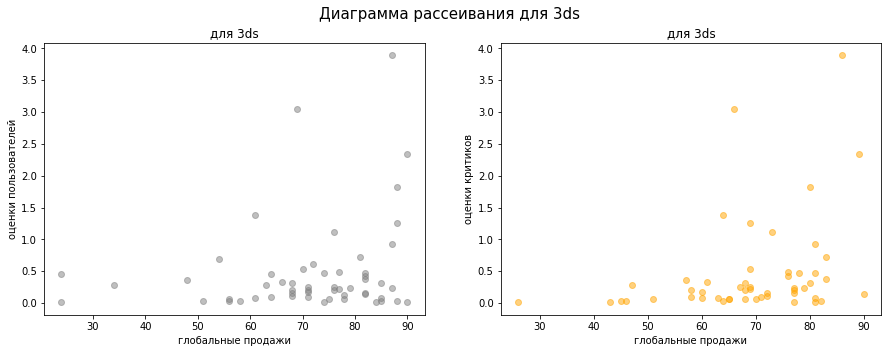

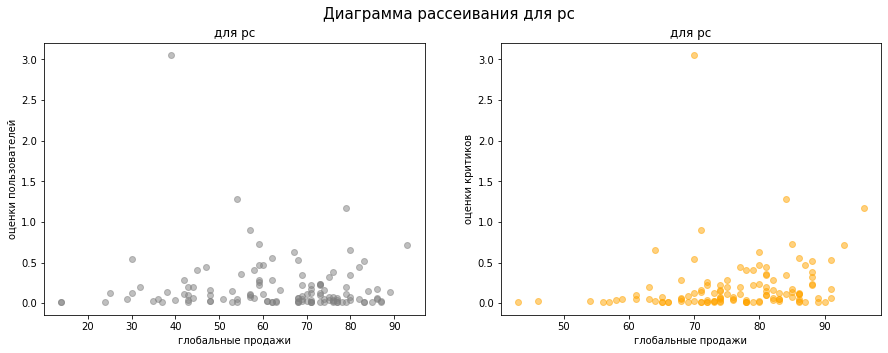

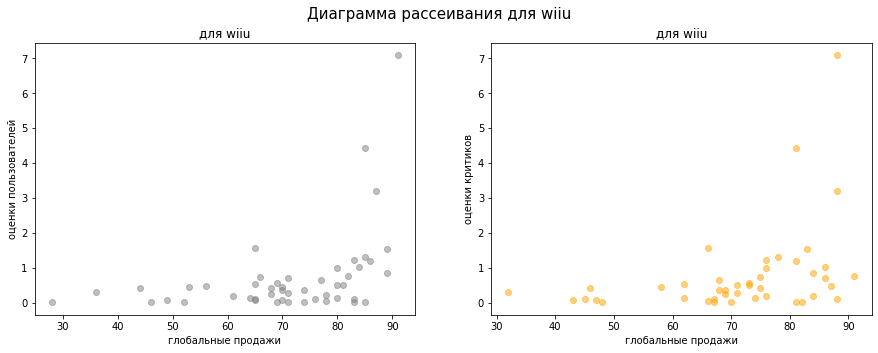

In [66]:
for item in chosen_platforms:
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle(f'Диаграмма рассеивания для {item}', fontsize=15)
    axs[0].scatter(x=data_final.query('platform == @item')['user_score'], 
                   y=data_final.query('platform == @item')['sum_sales'],
                   color='gray',
                   alpha=0.5,
                   )
    axs[0].set_title(f'для {item}')
    axs[0].set_xlabel('глобальные продажи')
    axs[0].set_ylabel('оценки пользователей')
    
    axs[1].scatter(x=data_final.query('platform == @item')['critic_score'],
                   y=data_final.query('platform == @item')['sum_sales'],
                   color='orange',
                   alpha=0.5,
                   )
    axs[1].set_title(f'для {item}')
    axs[1].set_xlabel('глобальные продажи')
    axs[1].set_ylabel('оценки критиков')

Похоже, это справедливо для всех платформ кроме WiiU, но это моя самая не популярная платформа из топ-5.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [67]:
data_final['genre'].unique()

array(['shooter', 'action', 'role-playing', 'sports', 'fighting',
       'racing', 'misc', 'platform', 'simulation', 'adventure', 'puzzle',
       'strategy'], dtype=object)

In [68]:
data_final.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: sum_sales, dtype: float64

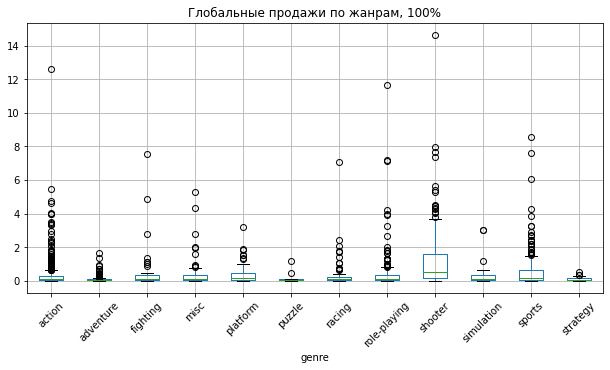

In [69]:
# boxplot
ax = data_final.boxplot(column='sum_sales', by='genre',figsize=(10,5), rot=45);
# plt.ylim(0,1);
plt.title('Глобальные продажи по жанрам, 100%');
plt.suptitle('');

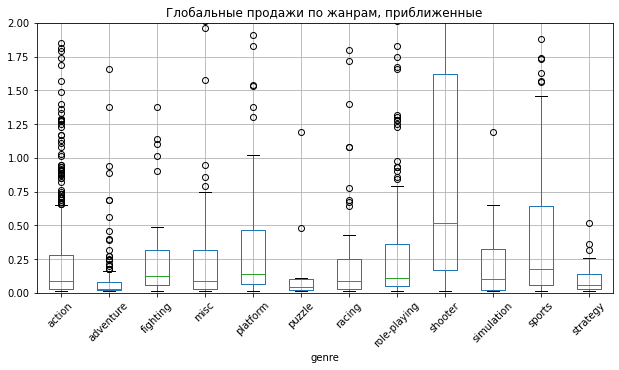

In [70]:
ax = data_final.boxplot(column='sum_sales', by='genre',figsize=(10,5), rot=45);
plt.ylim(0,2);
plt.title('Глобальные продажи по жанрам, приближенные');
plt.suptitle('');

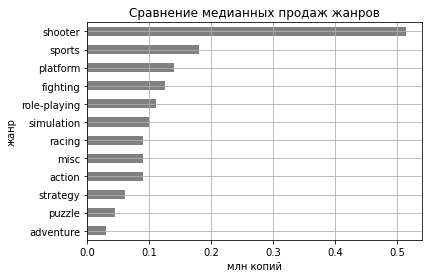

In [71]:
# Медианы сравнение
ax = data_final.groupby('genre')['sum_sales'].median().sort_values(ascending=True).plot(
        kind='barh',
        color='gray',
        title='Сравнение медианных продаж жанров',
        grid=True
    #xlabel='млн копий'
);

ax.set_xlabel('млн копий');
ax.set_ylabel('жанр');

---

Можно выделить топ-5 игр с максимальным количеством проданных копий: shooter, sports, platform, role-playing.  
В action игр в целом продается меньше, но в этом жанре очень много выбросов с высокими продажами.
Аутсайдерами будут стратегии, приключения и паззлы.

In [72]:
genres_chosen = ['shooter', 'sports', 'platform', 'role-playing', 'action']

### Шаг 4. Портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):  
+ Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
+ Самые популярные жанры (топ-5). Поясните разницу.  
+ Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

In [73]:
# Создам по таблице для региона, чтобы не запутаться (NA):
data_na = data_final[['rating', 'platform', 'genre', 'na_sales']].copy()
# Топ-5
top_plat_na = data_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genre_na = data_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
# Столбец с категориями
data_na['plat_category'] = data_na['platform']
data_na['genre_category'] = data_na['genre']

for index, row in data_na.iterrows():
    if row['platform'] not in top_plat_na:
        data_na.at[index, 'plat_category'] = 'other'
        
for index, row in data_na.iterrows():
    if row['genre'] not in top_genre_na:
        data_na.at[index, 'genre_category'] = 'other'

In [74]:
# Создам по таблице для региона, чтобы не запутаться (EU):
data_eu = data_final[['rating', 'platform', 'genre', 'eu_sales']].copy()
# Топ-5
top_plat_eu = data_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genre_eu = data_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
# Столбец с категориями
data_eu['plat_category'] = data_eu['platform']
data_eu['genre_category'] = data_eu['genre']

for index, row in data_eu.iterrows():
    if row['platform'] not in top_plat_eu:
        data_eu.at[index, 'plat_category'] = 'other'
        
for index, row in data_na.iterrows():
    if row['genre'] not in top_genre_eu:
        data_eu.at[index, 'genre_category'] = 'other'

In [75]:
# Создам по таблице для региона, чтобы не запутаться (JP):
data_jp = data_final[['rating', 'platform', 'genre', 'jp_sales']].copy()
# Топ-5
top_plat_jp = data_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genre_jp = data_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
# Столбец с категориями
data_jp['plat_category'] = data_jp['platform']
data_jp['genre_category'] = data_jp['genre']

for index, row in data_na.iterrows():
    if row['platform'] not in top_plat_jp:
        data_jp.at[index, 'plat_category'] = 'other'
        
for index, row in data_jp.iterrows():
    if row['genre'] not in top_genre_jp:
        data_jp.at[index, 'genre_category'] = 'other'

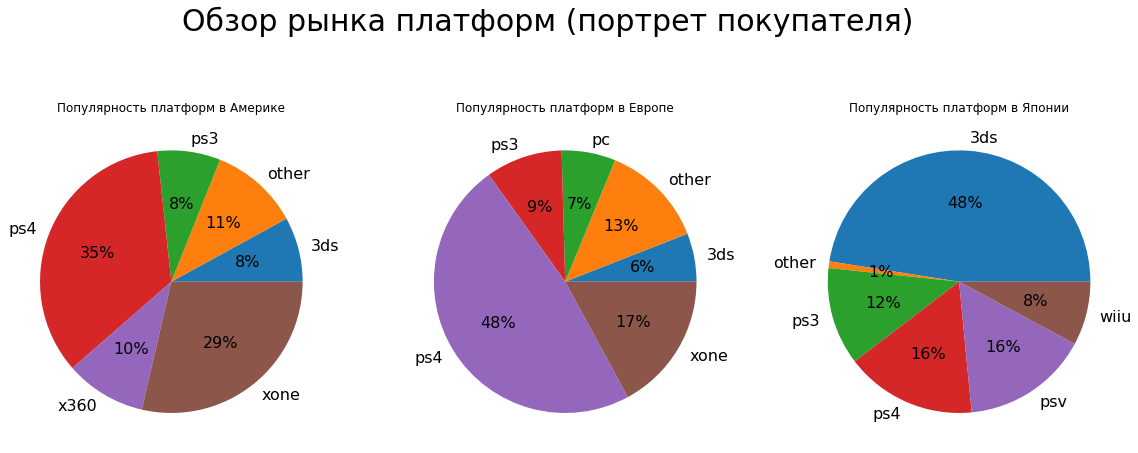

In [76]:
# Платформы
fig, ax = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=30)

plt.subplot(1,3,1)
data_na.groupby('plat_category')['na_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16, 
                                                                                     title='Популярность платформ в Америке'
                                                                                    );

plt.subplot(1,3,2)
data_eu.groupby('plat_category')['eu_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16,
                                                                                     title='Популярность платформ в Европе'
                                                                                    );

plt.subplot(1,3,3)
data_jp.groupby('plat_category')['jp_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16,
                                                                                     title='Популярность платформ в Японии'
                                                                                    );

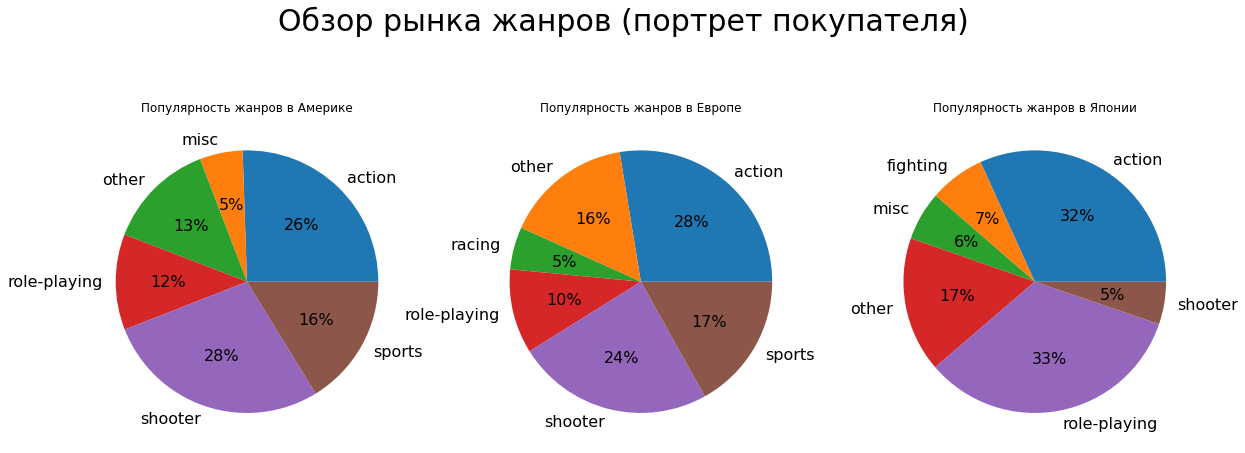

In [77]:
# Жанры
fig, ax = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize=30)

plt.subplot(1,3,1)
data_na.groupby('genre_category')['na_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16, 
                                                                                     title='Популярность жанров в Америке'
                                                                                    );

plt.subplot(1,3,2)
data_eu.groupby('genre_category')['eu_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16,
                                                                                     title='Популярность жанров в Европе'
                                                                                    );

plt.subplot(1,3,3)
data_jp.groupby('genre_category')['jp_sales'].sum().plot(kind='pie',
                                                                                     autopct='%1.0f%%',
                                                                                     ylabel='',
                                                                                     #colormap='Pastel2',
                                                                                     fontsize = 16,
                                                                                     title='Популярность жанров в Японии'
                                                                                    );

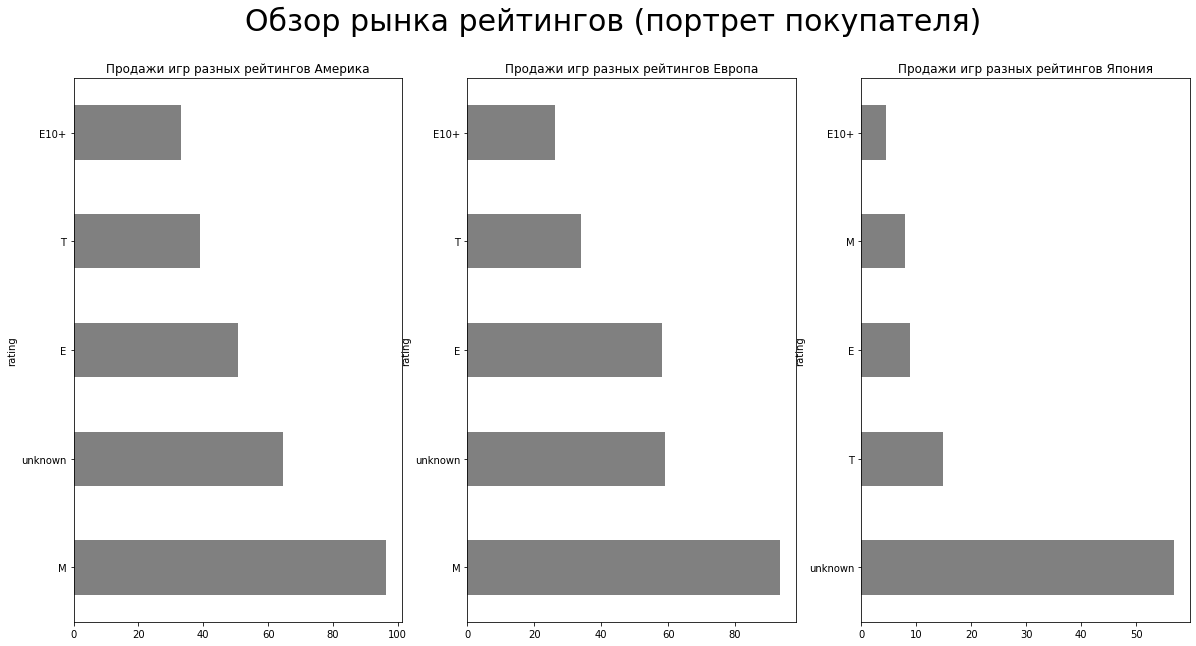

In [78]:
# Рейтинги
fig, ax = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('Обзор рынка рейтингов (портрет покупателя)', fontsize=30)

plt.subplot(1,3,1)
data_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                           title='Продажи игр разных рейтингов Америка',
                                                                           color='grey',
                                                                           ylabel=''
                                                                          );

plt.subplot(1,3,2)
data_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                           title='Продажи игр разных рейтингов Европа',
                                                                           color='grey'
                                                                          );

plt.subplot(1,3,3)
data_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                           title='Продажи игр разных рейтингов Япония',
                                                                           color='grey'
                                                                          );

**Портрет пользователя из европейского региона получается такой:**

+ Предпочитаемые платформы: PS4 и XOne;
+ Cамый популярный жанр: Action, Shooter, Sports;
+ Продажи игр зависят от рейтинга, игры с рейтингом M продаются на порядок лучше остальных.

**Портрет пользователя из европейского региона получается такой:**

+ Предпочитаемые платформы: PS4;
+ Cамый популярный жанр: Action, Shooter, Sports;
+ Продажи игр зависят от рейтинга, игры с рейтингом M продаются на порядок лучше остальных.



**Портрет пользователя из японского региона получается такой:**

+ Предпочитаемые платформы: 3DS;
+ Cамый популярный жанр: Action, Shooter, Role_Playing;
+ Сложно сказать про рейтинг из-за пропущенных данных

### Шаг 5. Проверка гипотез

#### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

+ H0: user_score XOne = user_score PC;
+ Н1: user_score XOne ≠ user_score PC.
  
alpha оставлю стандратным: 0.05  
Сравниваю среднее двух независимых совокупностей, альтернативная гипотеза ```≠```: выбираю метод ```st.ttest_ind()```

In [79]:
alpha = 0.05

# выборки разных размеров, equal_var=False
results = st.ttest_ind(
# В столбце user_score у меня было довольно много невосстановимых "nan", чтобы не влиять на тест дропну их
    data_final.query('platform == "xone"')['user_score'].dropna(),
    data_final.query('platform == "pc"')['user_score'].dropna(),
    equal_var=False,
)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, pvalue =', results.pvalue)
else:
    print('Не отвергаем нулевую гипотезу, pvalue =', results.pvalue)


Не отвергаем нулевую гипотезу, pvalue = 0.11601398086668918


In [80]:
data.query('platform == "xone"')['user_score'].dropna().mean()

65.21428571428571

In [81]:
data.query('platform == "pc"')['user_score'].dropna().mean()

70.62467532467532

Cредняя оценка пользователей для РС выше на 5 пунктов, но гипотезу 'user_score XOne = user_score PC' не отвергаем.


+ H0: user_score Action = user_score Sports;  
+ Н1: user_score Action >= user_score Sports. 
 

In [82]:
# выборки разных размеров, equal_var=False
results = st.ttest_ind(
# В столбце user_score у меня было довольно много невосстановимых "nan", чтобы не влиять на тест дропну их
    data_final.query('genre == "action"')['user_score'].dropna(),
    data_final.query('genre == "sports"')['user_score'].dropna(),
    equal_var=False, alternative='greater'
)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))
else:
    print('Не отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))


Отвергаем нулевую гипотезу, pvalue = 0.0



+ H0: user_score Action = user_score Sports;  
+ Н1: user_score Action <= user_score Sports. 
 

In [83]:
# выборки разных размеров, equal_var=False
results = st.ttest_ind(
# В столбце user_score у меня было довольно много невосстановимых "nan", чтобы не влиять на тест дропну их
    data_final.query('genre == "action"')['user_score'].dropna(),
    data_final.query('genre == "sports"')['user_score'].dropna(),
    equal_var=False, alternative='less'
)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))
else:
    print('Не отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))


Не отвергаем нулевую гипотезу, pvalue = 1.0


---

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

+ H0: user_score Action = user_score Sports;  
+ Н1: user_score Action ≠ user_score Sports. 

Альтернативная гипотеза в сторону увеличения Action, так как этот жанр занимал первые места в двух регионах по популярности.  
Сравниваю среднее двух независимых совокупностей, альтернативная гипотеза ```≠```: выбираю метод ```st.ttest_ind()```

In [84]:
# выборки разных размеров, equal_var=False
results = st.ttest_ind(
# В столбце user_score у меня было довольно много невосстановимых "nan", чтобы не влиять на тест дропну их
    data_final.query('genre == "action"')['user_score'].dropna(),
    data_final.query('genre == "sports"')['user_score'].dropna(),
    equal_var=False,
)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))
else:
    print('Не отвергаем нулевую гипотезу, pvalue =', results.pvalue.round(4))


Отвергаем нулевую гипотезу, pvalue = 0.0


In [85]:
data_final.query('genre == "action"')['user_score'].dropna().mean().round(4)

67.6061

In [86]:
data.query('genre == "sports"')['user_score'].dropna().mean().round(4)

69.6252

p-value очень маленькое число, гипотезу Н0 отвергаем в пользу **Н1: user_score Action ≠ user_score Sports**.

In [87]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Шаг 6. Вывод

**Цель исследования:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Входные данные:** данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы по состоянию на 2016 год.

---

Для более точного анализа была проведена работа по удалению пропусков, обработке аномальных значений, обработке дубликатов и изменению формата данных:

+ user_score и critic_score приведены к одному виду;
+ year_of_release изменен формат на Int64;
+ все названия столбцов приведены к змеиному регистру;
+ добавлен специальный столбец для суммарных глобальных продаж каждой игры;
+ удалены полные дубликаты по name.

---

Визуализация некоторых данных:


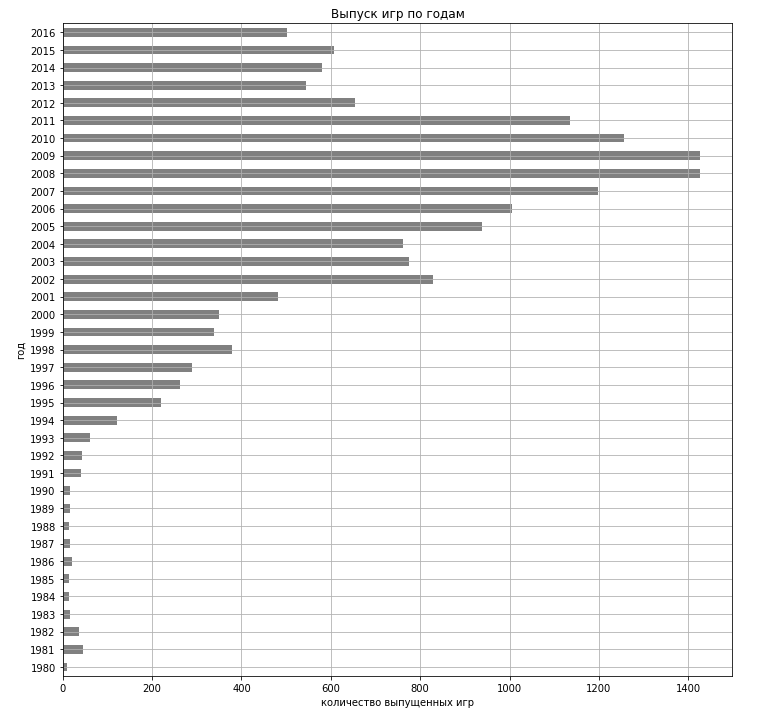

Были отсечены данные до 2012 года как не актуальные;

Связь между количеством проданных копий и оценками на примере платформы PS4 (остальные платформы демонстрируют схожую динамику):

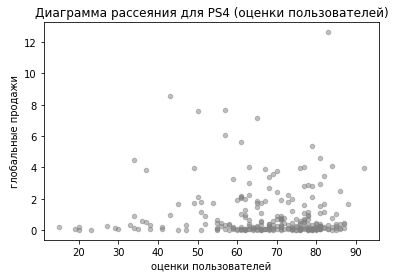
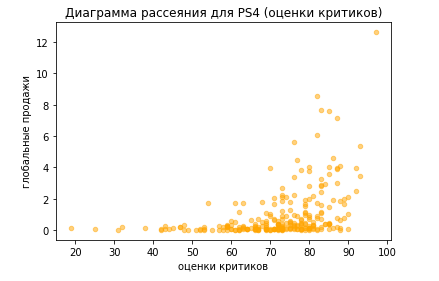

---
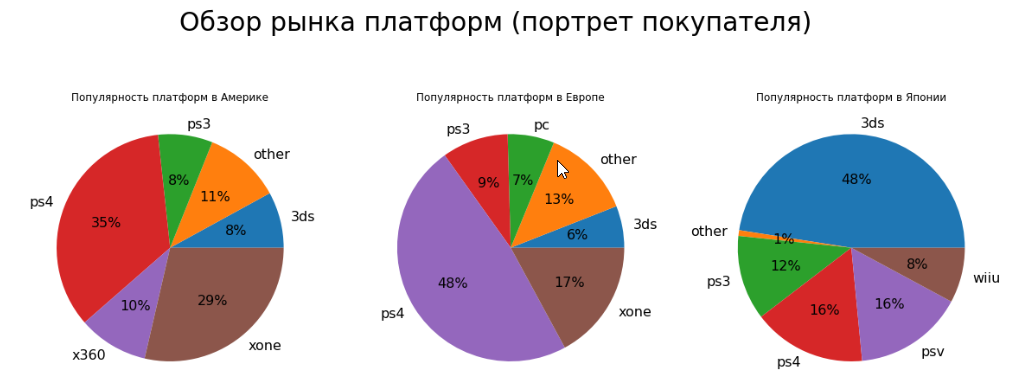

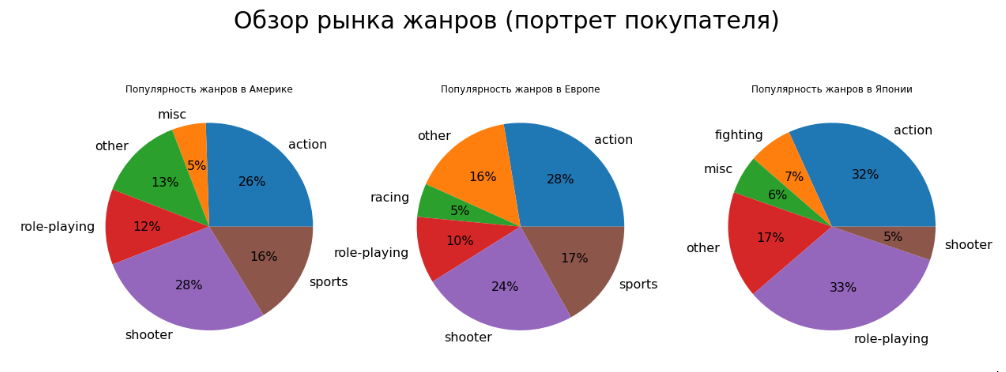

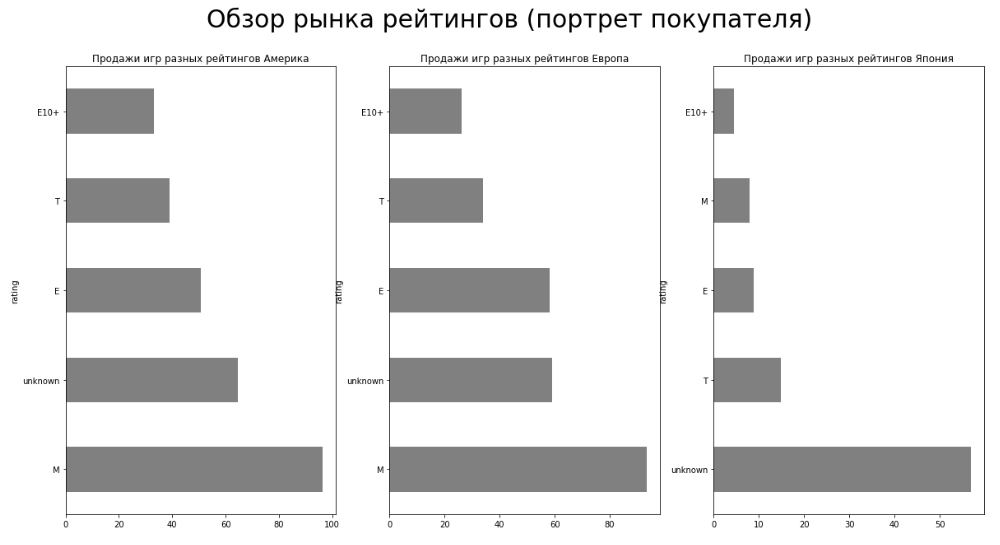

Для того, чтобы понять, какой продукт наиболее выгоден для магазина, нужно было проверить гипотезы:

+ Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые: отвергнуть гипотезу нельзя

+ Гипотезу Н0: оценки пользователей sports и action одинаковые отвергли.

---

**Итоговый вывод:** Исследование показало ряд закономерностей в предпочтениях пользователей. Некоторые критерии напрямую связаны с количеством продаж, а соответственно, с прибылью. Обратить внимание при выборе игры для закупок однозначно стоит на:

- оценки пользователей и критиков;
- регион, в котором планируется работать: популярные жанры и платформы в азии и на западе сильно различаюся;
- рейтинг игры

Так же стоит учесть срок жизненного цикла игровой платформы в 10 лет, покупать те, которые буду актуальны еще длительный период времени.